In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [2]:
df_trace = pd.read_csv('model_results.csv')

In [3]:
df_trace.head()

,datasize,real,model
0,49200.0,0.122337,0.115488
1,42400.0,0.106624,0.096826
2,45000.0,0.112544,0.117376
3,52000.0,0.128928,0.119405
4,44000.0,0.110561,0.114178


In [4]:
df_sorted = df_trace.sort_values(['datasize'], ascending=True)

In [5]:
df_sorted.head()

,datasize,real,model
19,40000.0,0.100801,0.092400
11,40200.0,0.101281,0.093240
55,40400.0,0.101729,0.093744
29,40600.0,0.102464,0.093576
37,40800.0,0.102593,0.093408


In [6]:
datasize = []
real_ls = []
pred_ls = []

# select the 1st 10 samples
count = 0
for index,row in df_sorted.iterrows():
    datasize.append(float(row['datasize']))
    real_ls.append(float(row['real']))
    pred_ls.append(float(row['model']))
    
    count += 1
    if count == 20:
        break

In [7]:
print datasize[0]
print real_ls[0]
print pred_ls[0]

40000.0
0.100801
0.0924000000001


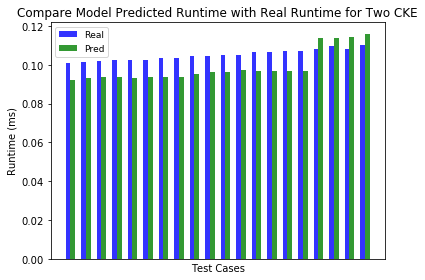

In [8]:
n_groups = len(datasize)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

bar1 = plt.bar(index, real_ls, bar_width, alpha=opacity, color='b', label='Real')
bar2 = plt.bar(index + bar_width, pred_ls, bar_width, alpha=opacity, color='g', label='Pred')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off


plt.xlabel('Test Cases')
plt.ylabel('Runtime (ms)')
plt.title('Compare Model Predicted Runtime with Real Runtime for Two CKE')

plt.legend(prop={'size':9})
 
plt.tight_layout()
plt.show()

### compute the error rate

In [9]:
df_sorted.head()

,datasize,real,model
19,40000.0,0.100801,0.092400
11,40200.0,0.101281,0.093240
55,40400.0,0.101729,0.093744
29,40600.0,0.102464,0.093576
37,40800.0,0.102593,0.093408


In [10]:
# df_sorted['diff'] = df_sorted['real'] - df_sorted['model']
df_sorted['error'] = abs(df_sorted['real'] - df_sorted['model'] )/ df_sorted['real'] 

In [11]:
df_sorted.head()

,datasize,real,model,error
19,40000.0,0.100801,0.092400,0.083342
11,40200.0,0.101281,0.093240,0.079393
55,40400.0,0.101729,0.093744,0.078493
29,40600.0,0.102464,0.093576,0.086743
37,40800.0,0.102593,0.093408,0.089529


In [12]:
df_sorted['error'].mean()

0.059454859367263094

In [13]:
df_sorted['error'].std()

0.023159294001023067

In [16]:
df_sorted.shape

(59, 4)